# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

### Geometric Brownian Motion:

The Geometric Brownian Motion (GBM) is given by

$$ d S(t) = \mu S(t) \, dt + \sigma S(t) \, dW(t) $$

this stochastic differential equation (SDE) represents a variant of Brownian motion. In this equation, $ \mu $ is the drift term, which measures the average growth rate of the asset price $ S(t) $, while $ \sigma $ is the volatility, which measures the magnitude of the statistical price fluctuations. The term $ dW(t) $ is the differential of the Wiener process, which introduces randomness into the variation of the spot price $ S(t) $.

The Wiener process $ W(t) $ has specific properties:

- $ W(0) = 0 $
- The increments $ W(t) - W(s) $ are stationary and independent.
- For $ t > s $, the increment $ W(t) - W(s) $ follows a normal distribution $ N(0, t - s) $.

Thus, the Wiener process can be thought as a continuous version of a random walk with normally distributed increments, where its differential $ dW(t) $ provides the stochastic component in the evolution of $ S(t) $.

However, it is important to note that for $GBM$, the relevant form of the $SDE$ is not this expression, but rather

$$ \frac{d S(t)}{S(t)} $$

which lead to:

$$dlnS(t)=(μ−\frac{1}{2}σ^2 )dt+σdW(t)$$

which implies that the logarithm of the asset price follows a Wiener process with a (constant) drift. Consequently, the price $ S(t) $ has a log-normal distribution:

$$
p(S', t' | S, t) = \frac{1}{\sqrt{2 \pi \sigma^2 (t' - t) S'^2}} \exp ( -\frac{1}{2} \left[ \frac{\ln\left(\frac{S'}{S}\right) - \left(\mu - \frac{\sigma^2}{2}\right)(t' - t)}{\sigma \sqrt{t' - t}} \right]^2 ).
$$



with its expected value centered at

$$ \langle \ln(S(t)) \rangle = \left( \mu - \frac{1}{2} \sigma^2 \right) t $$

and variance

$$ \langle \ln(S(t))^2 \rangle = \sigma^2 t $$.



### How to sampling GBR:


<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

An observation to verify: This method is exact (no discretization error) in the sense that the sequence it produces has the joint distribution of the process $ S \sim \text{GBM}(\mu, \sigma^2) $ at $ t_0, t_1, \ldots, t_n $.

### Contracts in idealized markets:
A prudent investor aims to mitigate risk and protect against potential losses, for this reason a *derivative* is a financial product whose value "derives" from the price of an underlying asset. Mathematically, if the underlying asset has a price $S(t)$, then a derivative is simply a function of $S(t)$.
### Options:
*Options* are contracts in which only one party takes on an obligation, while the other party gains a right. There are various types of options; the simplest are European options.
A *European option* is a contract between two parties where:
    - The seller of the option, known as the *writer*, 
    - Grants the buyer of the option, known as the *holder*,
    - The right to buy (in the case of a *call option*) or sell (in the case of a *put option*) an underlying asset (with current spot price $ S(t) $) 
    - For a predetermined price $ K$, known as the *exercise* or *strike price*, 
    - At a specified future date $T $, known as the *expiry date*.

- The key characteristic of an option is that only the writer is obligated. They must buy or sell the underlying asset at the strike price at time $ T $.
- The holder will exercise this right only if it results in a profit. For a call option, this happens if $ S(T) > K $; otherwise, the holder can buy the underlying asset at a cheaper price on the open market if $ S(T) < K $.

    - **Profit for a call option:** $ \text{profit} = \max[0, S(T) - K] $
    - **Profit for a put option:** $ \text{profit} = \max[0, K - S(T)] $

Naturally, the writer does not assume this financial obligation without receiving compensation, known as the *premium*, for selling the option.




### How much should an option cost?
### The case of plain vanilla:
Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

### Using Monte Carlo Simulation:

When moving beyond the Black-Scholes assumptions, such as allowing for $S(t)$ not to follow a Geometric Brownian Motion (GBM) with constant $\mu$ and $\sigma$, or when exploring other types of options (e.g., exotic options), an analytical solution is no longer possible, Monte Carlo simulations become necessary: considering an asset with price $S(t)$ and a European call option based on it; assuming that the evolution of $S(t)$ is given by $S \sim \text{GBM}(r, \sigma^2)$, it is possible to note that the profit at expiry (when $t = T$) is given by $(S(T) - K) := \max[0, S(T) - K]$.

To find the present value of this profit at time $t$, it is needed to discount it by a factor $e^{-rT}$, accounting for the interest rate a bank would have provided for a deposit starting from $t_0 = 0$. Specifically:

  - At $t = t_0$, the initial value is: $e^{-rT} (S(T) - K)$
  - At $t = T$, the final value becomes: $e^{rT} e^{-rT} (S(T) - K) = (S(T) - K)$
Therefore, the calculation of the option price corresponds to computing the expected (average) value of the discounted profit across the distribution of prices at expiry:

  $$
  E\left[e^{-rT}(S(T) - K)\right] = \langle e^{-rT}(S(T) - K) \rangle
  $$

This quantity represents the amount the option holder would need to pay at $t = 0$ based on the expected profit at $t = T$.
Using this approach, we can calculate the value to which the price of the call option converges:

$$
C[S(0), 0] = E\left[e^{-rT}(S(T) - K)\right]
$$

and similarly for the put option:

$$
P[S(0), 0] = E\left[e^{-rT}(K - S(T))\right]
$$


### Exercise 3.1 request:

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### About the Code:
For this exercise, a total of $10^6$ throws were used across $100$ blocks. In the case of discrete sampling, $100$ steps were used as stated in the assignment.

### Direct Sampling:
For direct sampling in `.\Esercizio_3_1\funzioni.cpp`, there is a method `spot_price_ST_direct(r, sigma, T, S_init, rnd)`, which, accepting the required data from the exercise, is able to measure the value of $S(t)$ as a GBM centered at $\mu$ and $\sigma$:

```cpp
double spot_price_ST_direct (double mean, double volatility, double T, double initial_ST, Random& rnd) {
    double z = rnd.Gauss(0., 1.);
    return (initial_ST * exp((mean - 0.5 * pow(volatility, 2)) * T + volatility * z * pow(T, 0.5)));
};
```
After calculating this, it is possible to compute the value of the Call option $C(T,0)$ and the Put option $P(T,0)$:
```cpp
for (int l = 0; l < L; l++){
         S = spot_price_ST_direct(r, sigma, T, S_init, rnd);
         C += exp(-1 * r * T) * max(0., S - K);
         P += exp(-1 * r * T) * max(0., K - S);
      }
```
Subsequently, using the data blocking method, it is possible to estimate the mean value and uncertainty.

### Discrete Sampling:
In the case of discrete sampling, the only thing that changes is the way to calculate the spot price, which is computed in a discretized manner with a step of $\frac{T}{step}$:
```cpp
    double spot_price_ST_discreto (double mean, double volatility, double T, double initial_ST ,Random& rnd ,double step){
       double z;
       double ST = initial_ST;
       double incremento =  T/ (double) step;
       for (int i = 0; i < step ; i ++){
          z = rnd.Gauss(0., 1.);
          ST = ST * exp ( ( mean-0.5*pow(volatility,2) ) * incremento + volatility * z * pow( incremento ,0.5 ))  ;
          
       }
     return ST;
    };
```
Again, the data blocking method is used to estimate the mean value and uncertainty. 

Below are the results comparing with the analytic expecting data for Call and Put
$$
C_{ex}= 14.975  \    P_{ex} = 5.459
$$

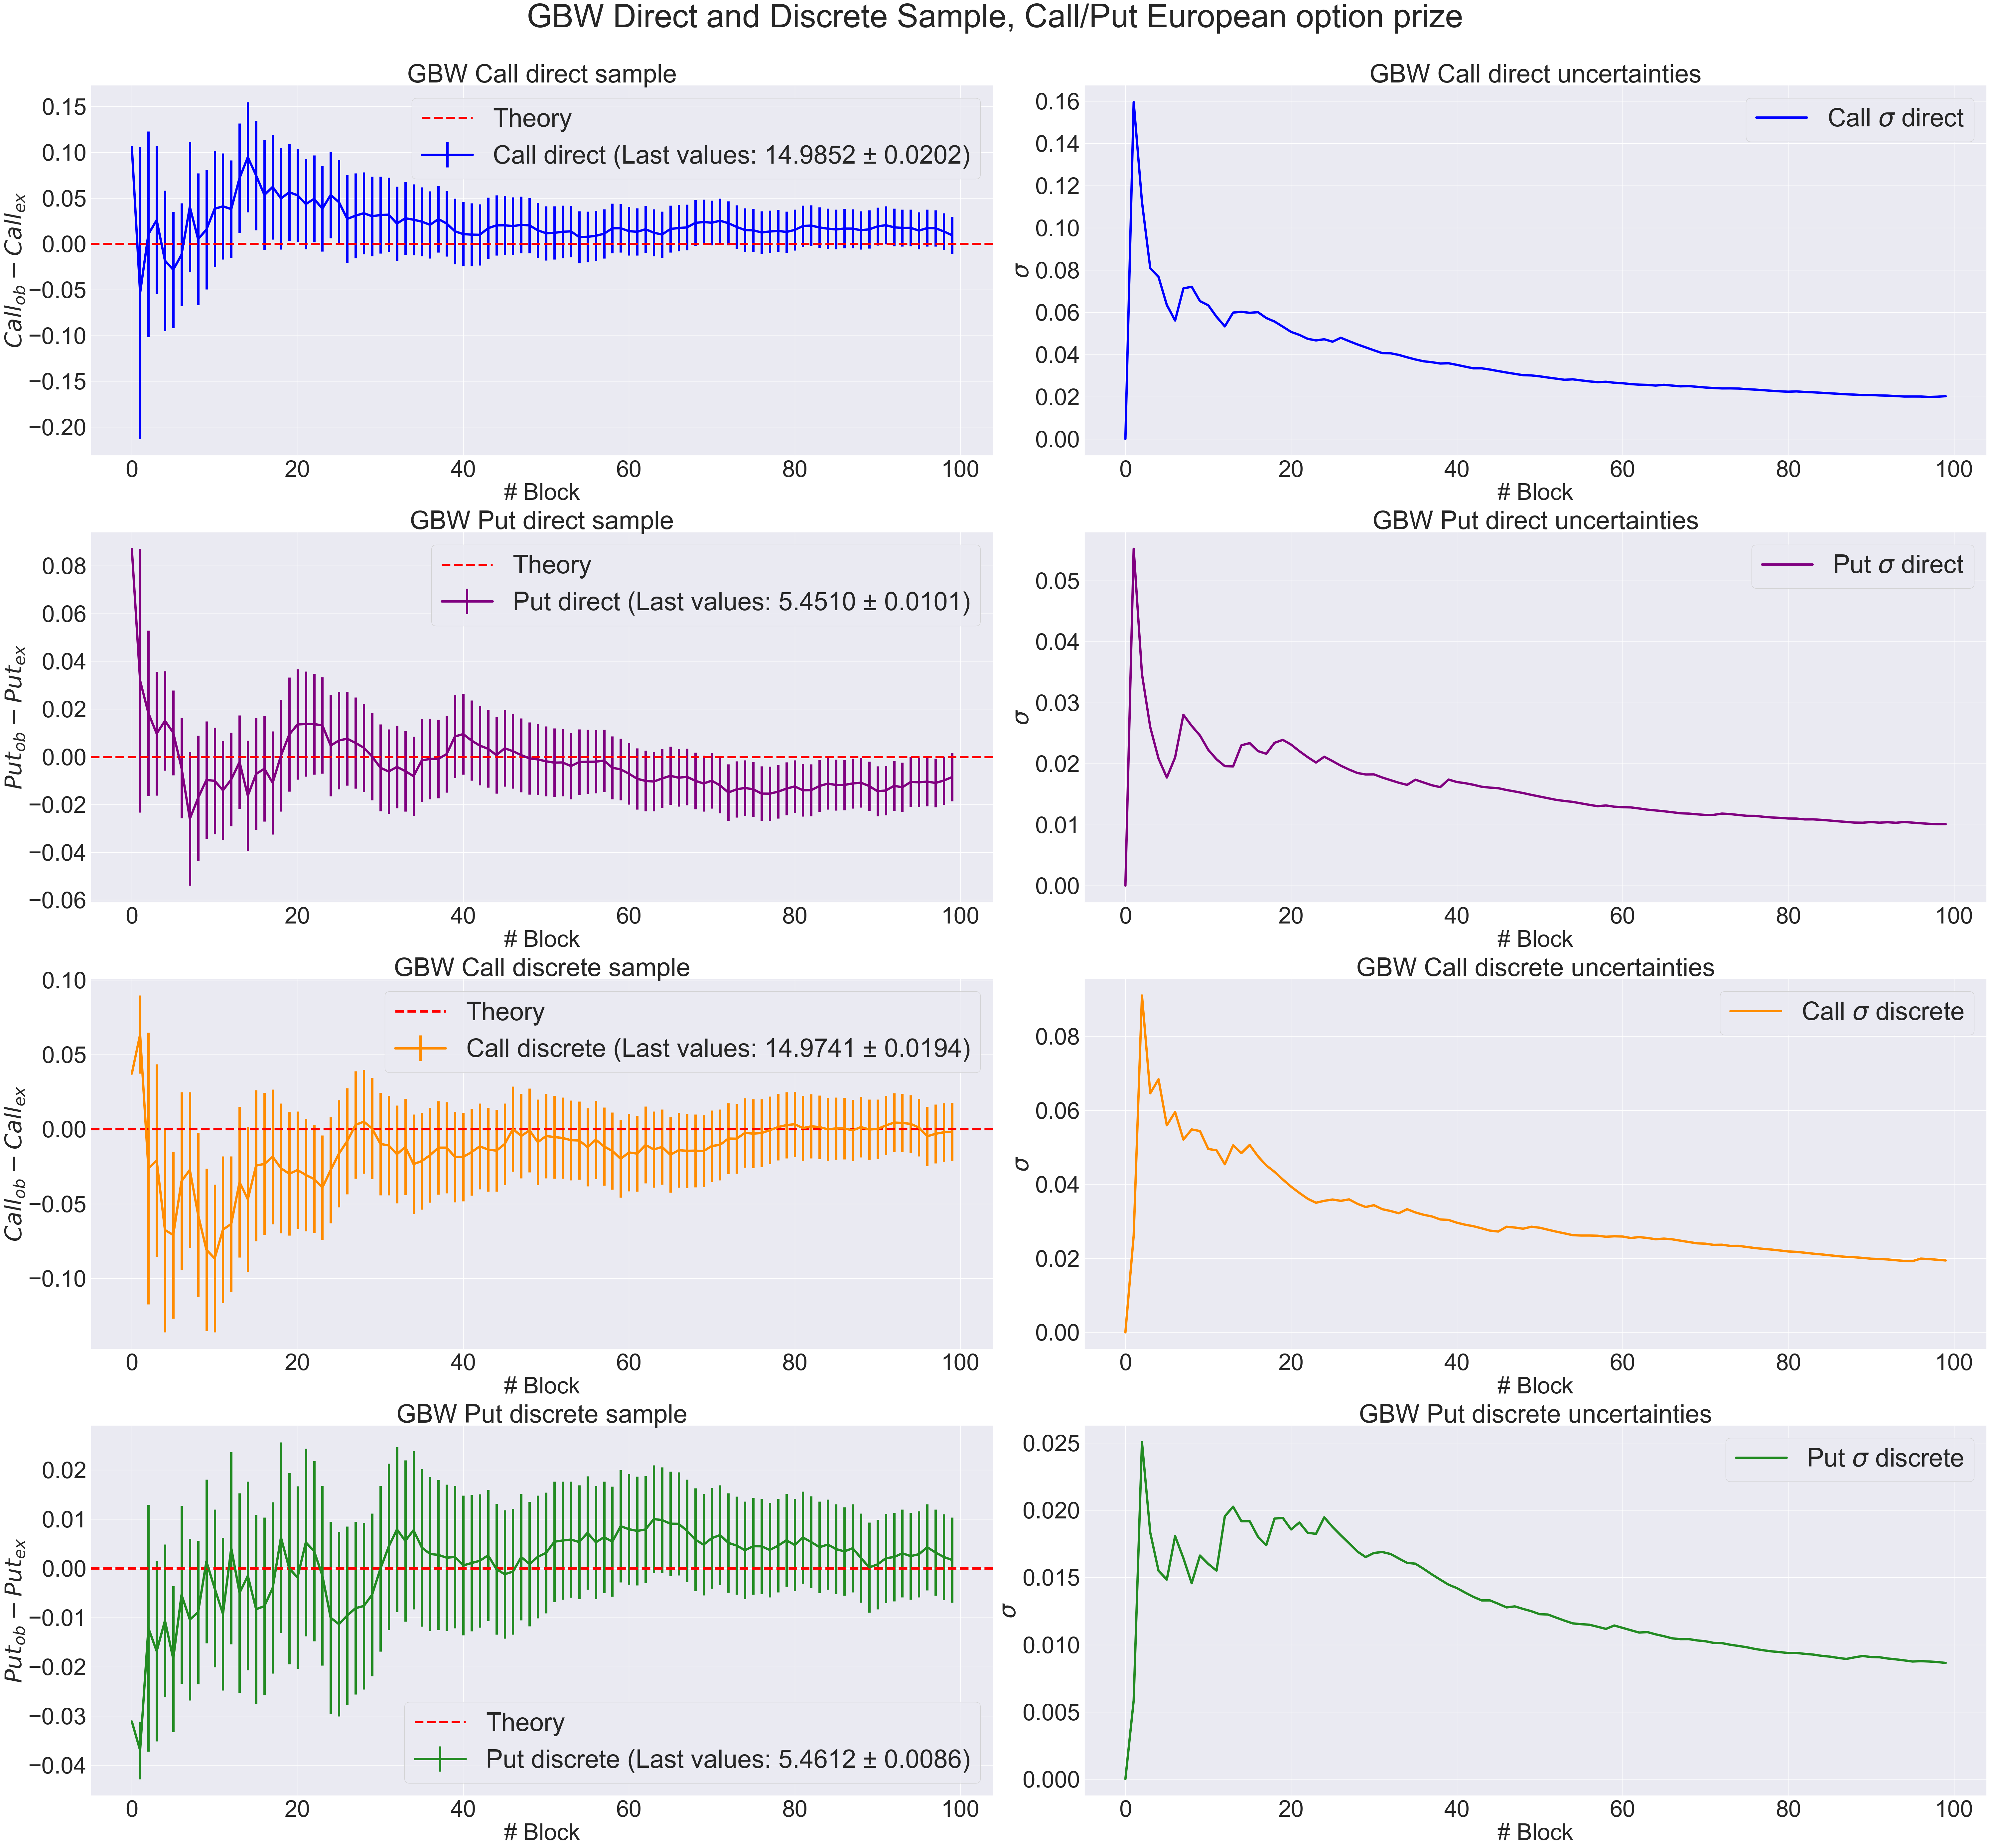

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style='dark')

data_GBW_dir_Call = np.loadtxt('Esercizio_3_1/GBW_direct_Call.txt', usecols=(0, 1))
data_GBW_dir_Put = np.loadtxt('Esercizio_3_1/GBW_direct_Put.txt', usecols=(0, 1))
data_GBW_dis_Call = np.loadtxt('Esercizio_3_1/GBW_discrete_Call.txt', usecols=(0, 1))
data_GBW_dis_Put = np.loadtxt('Esercizio_3_1/GBW_discrete_Put.txt', usecols=(0, 1))

media_GBW_dir_Call = data_GBW_dir_Call[:, 0]
err_GBW_dir_Call = data_GBW_dir_Call[:, 1]

media_GBW_dir_Put = data_GBW_dir_Put[:, 0]
err_GBW_dir_Put = data_GBW_dir_Put[:, 1]

media_GBW_dis_Call = data_GBW_dis_Call[:, 0]
err_GBW_dis_Call = data_GBW_dis_Call[:, 1]

media_GBW_dis_Put = data_GBW_dis_Put[:, 0]
err_GBW_dis_Put = data_GBW_dis_Put[:, 1]

step = np.arange(0, 100, 1)

# Ultimi valori delle medie e degli errori per ciascun dataset
last_media_GBW_dir_Call = media_GBW_dir_Call[-1]
last_err_GBW_dir_Call = err_GBW_dir_Call[-1]

last_media_GBW_dir_Put = media_GBW_dir_Put[-1]
last_err_GBW_dir_Put = err_GBW_dir_Put[-1]

last_media_GBW_dis_Call = media_GBW_dis_Call[-1]
last_err_GBW_dis_Call = err_GBW_dis_Call[-1]

last_media_GBW_dis_Put = media_GBW_dis_Put[-1]
last_err_GBW_dis_Put = err_GBW_dis_Put[-1]

fig = plt.figure(figsize=(60, 55))
fig.suptitle('GBW Direct and Discrete Sample, Call/Put European option prize', y=1.01, fontsize=70)  

# Impostazioni delle dimensioni dei font per etichette degli assi e titoli
axis_label_fontsize = 50
title_fontsize = 55
legend_fontsize = 55

# GBW Call Direct Sample
ax = plt.subplot(4, 2, 1)
plt.errorbar(step, media_GBW_dir_Call - 14.975790778311286, yerr=err_GBW_dir_Call, 
             linestyle='-', color="blue", ecolor='blue', 
             label=f'Call direct (Last values: {last_media_GBW_dir_Call:.4f} ± {last_err_GBW_dir_Call:.4f})', lw=5)  
plt.xlabel('# Block', fontsize=axis_label_fontsize)
plt.ylabel('$Call_{ob}-Call_{ex}$', fontsize=axis_label_fontsize)
plt.title('GBW Call direct sample', fontsize=title_fontsize)
plt.axhline(0.0, ls='--', c='red', label='Theory', lw=5)
plt.xticks(fontsize=axis_label_fontsize)
plt.yticks(fontsize=axis_label_fontsize)
plt.grid(True)
plt.legend(fontsize=legend_fontsize)

# GBW Call Direct Uncertainty
ax = plt.subplot(4, 2, 2)
plt.errorbar(step, err_GBW_dir_Call, linestyle='-', color="blue", label=r'Call $\sigma$ direct', lw=5)  
plt.xlabel('# Block', fontsize=axis_label_fontsize)
plt.ylabel(r'$\sigma$', fontsize=axis_label_fontsize)
plt.title('GBW Call direct uncertainties', fontsize=title_fontsize)
plt.xticks(fontsize=axis_label_fontsize)
plt.yticks(fontsize=axis_label_fontsize)
plt.grid(True)
plt.legend(fontsize=legend_fontsize)

# GBW Put Direct Sample
ax = plt.subplot(4, 2, 3)
plt.errorbar(step, media_GBW_dir_Put - 5.4595325819072364, yerr=err_GBW_dir_Put, 
             linestyle='-', color="purple", ecolor='purple', 
             label=f'Put direct (Last values: {last_media_GBW_dir_Put:.4f} ± {last_err_GBW_dir_Put:.4f})', lw=5)  
plt.xlabel('# Block', fontsize=axis_label_fontsize)
plt.ylabel(r'$Put_{ob}-Put_{ex}$', fontsize=axis_label_fontsize)
plt.title('GBW Put direct sample', fontsize=title_fontsize)
plt.axhline(0.0, ls='--', c='red', label='Theory', lw=5)
plt.xticks(fontsize=axis_label_fontsize)
plt.yticks(fontsize=axis_label_fontsize)
plt.grid(True)
plt.legend(fontsize=legend_fontsize)

# GBW Put Direct Uncertainty
ax = plt.subplot(4, 2, 4)
plt.errorbar(step, err_GBW_dir_Put, linestyle='-', color="purple", label=r'Put $\sigma$ direct', lw=5)  
plt.xlabel('# Block', fontsize=axis_label_fontsize)
plt.ylabel(r'$\sigma$', fontsize=axis_label_fontsize)
plt.title('GBW Put direct uncertainties', fontsize=title_fontsize)
plt.xticks(fontsize=axis_label_fontsize)
plt.yticks(fontsize=axis_label_fontsize)
plt.grid(True)
plt.legend(fontsize=legend_fontsize)

# GBW Call Discrete Sample
ax = plt.subplot(4, 2, 5)
plt.errorbar(step, media_GBW_dis_Call - 14.975790778311286, yerr=err_GBW_dis_Call, 
             linestyle='-', color="darkorange", ecolor='darkorange', 
             label=f'Call discrete (Last values: {last_media_GBW_dis_Call:.4f} ± {last_err_GBW_dis_Call:.4f})', lw=5)  
plt.xlabel('# Block', fontsize=axis_label_fontsize)
plt.ylabel('$Call_{ob}-Call_{ex}$', fontsize=axis_label_fontsize)
plt.title('GBW Call discrete sample', fontsize=title_fontsize)
plt.axhline(0.0, ls='--', c='red', label='Theory', lw=5)
plt.xticks(fontsize=axis_label_fontsize)
plt.yticks(fontsize=axis_label_fontsize)
plt.grid(True)
plt.legend(fontsize=legend_fontsize)

# GBW Call Discrete Uncertainty
ax = plt.subplot(4, 2, 6)
plt.errorbar(step, err_GBW_dis_Call, linestyle='-', color="darkorange", label=r'Call $\sigma$ discrete', lw=5)  
plt.xlabel('# Block', fontsize=axis_label_fontsize)
plt.ylabel(r'$\sigma$', fontsize=axis_label_fontsize)
plt.title('GBW Call discrete uncertainties', fontsize=title_fontsize)
plt.xticks(fontsize=axis_label_fontsize)
plt.yticks(fontsize=axis_label_fontsize)
plt.grid(True)
plt.legend(fontsize=legend_fontsize)

# GBW Put Discrete Sample
ax = plt.subplot(4, 2, 7)
plt.errorbar(step, media_GBW_dis_Put - 5.4595325819072364, yerr=err_GBW_dis_Put, 
             linestyle='-', color="forestgreen", ecolor='forestgreen', 
             label=f'Put discrete (Last values: {last_media_GBW_dis_Put:.4f} ± {last_err_GBW_dis_Put:.4f})', lw=5)  
plt.xlabel('# Block', fontsize=axis_label_fontsize)
plt.ylabel('$Put_{ob}-Put_{ex}$', fontsize=axis_label_fontsize)
plt.title('GBW Put discrete sample', fontsize=title_fontsize)
plt.axhline(0.0, ls='--', c='red', label='Theory', lw=5)
plt.xticks(fontsize=axis_label_fontsize)
plt.yticks(fontsize=axis_label_fontsize)
plt.grid(True)
plt.legend(fontsize=legend_fontsize)

# GBW Put Discrete Uncertainty
ax = plt.subplot(4, 2, 8)
plt.errorbar(step, err_GBW_dis_Put, linestyle='-', color="forestgreen", label=r'Put $\sigma$ discrete', lw=5)  
plt.xlabel('# Block', fontsize=axis_label_fontsize)
plt.ylabel(r'$\sigma$', fontsize=axis_label_fontsize)
plt.title('GBW Put discrete uncertainties', fontsize=title_fontsize)
plt.xticks(fontsize=axis_label_fontsize)
plt.yticks(fontsize=axis_label_fontsize)
plt.grid(True)
plt.legend(fontsize=legend_fontsize)

fig.tight_layout()
plt.show()


### Observation and Discussion

In these plots, we can observe how the Call and Put prices for European options converge to the analytical values for each method, with discrete sampling achieving a value with an error, $\sigma$, approximately half as large:
- $C_{dir} = 14.9852 \pm 0.0202$
- $C_{dis} = 14.9721 \pm 0.0194$
- $P_{dir} = 5.4510 \pm 0.0101$
- $P_{dis} = 5.4612 \pm 0.0086$

In the first blocks, the values fluctuate due to data blocking.


### For comparison, Black-Scholes analytic solution:

In [1]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364
